<a href="https://colab.research.google.com/github/Swap1984/swapnil/blob/main/ANS_Assignment_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Exploration part of the assignment**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import sklearn as skl


I have used pandas, numpy, and scipy to execute numerical calculation on the data set . Matplotlib, seaborn will hepl with visualisation of data in dataset.Sklearn can be used for data mining and data analysis.



In [ ]:
data = pd.read_csv('/dataset_heart.csv')

the dataset was downloaded from kaggle and uploaded to content folder pf the google drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
data

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [ ]:
# data structures
type(data)
data.shape

(270, 14)

In [ ]:
#data types
data.dtypes

age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
heart disease                             int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

Here by data.info() we understand that there are no null values and all values are numeric.


In [ ]:
# to find no of duplicated rows
data[data.duplicated()].shape

(0, 14)

Thus we see that our data has no duplicate values so moving forward to outlier detections


using Histogram for all columnns we need the bins and figsize to be defined

In [ ]:
# finding outliers
n = len(data)
bins = int(np.sqrt(n))
bins


16

In [ ]:
num_cols = data.shape[1]
figsize = (num_cols * 2, 15)  # 5 inches width per plot
figsize


(28, 15)

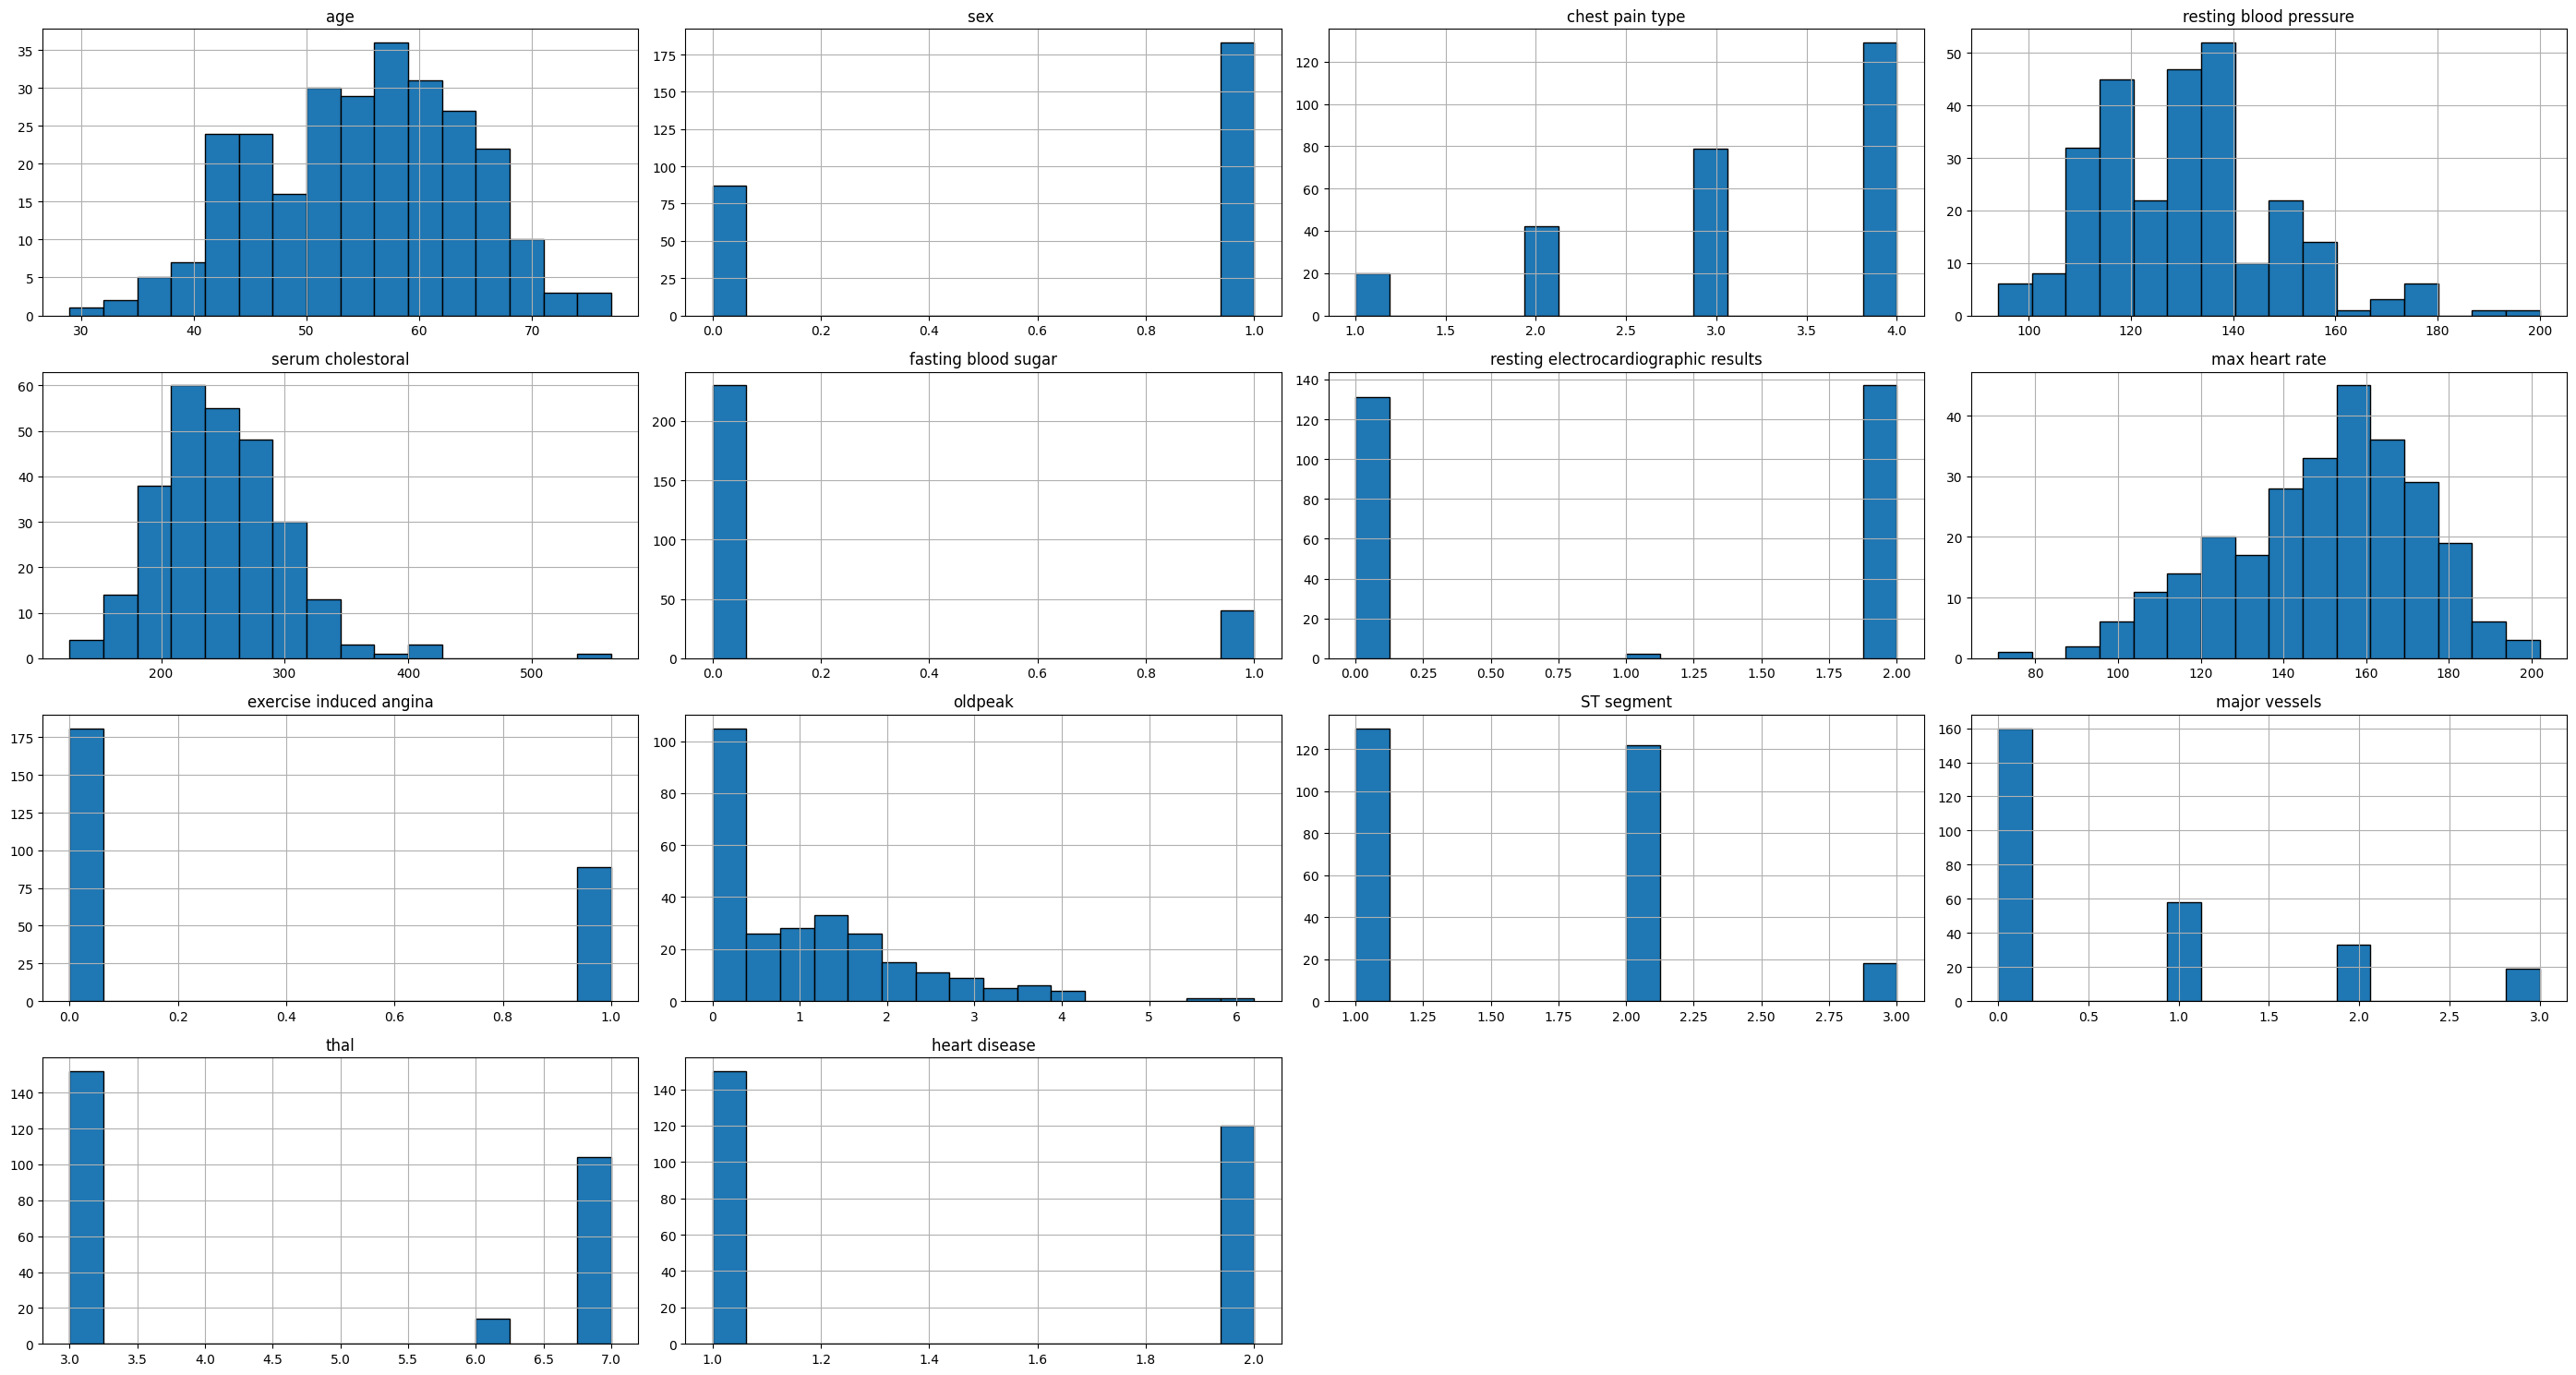

In [ ]:
# plotting the histogram for all columns
data.hist(figsize=figsize, bins=bins, edgecolor='black')
plt.tight_layout()
plt.show()


In [ ]:
# plotting individual histograms for all columns.
# renaming columns

data_cleaned1 = data.rename( {'chest pain type' : 'cpt', 'resting blood pressure' :'rbt', 'serum cholestoral' :'sc', 'fasting blood sugar' : 'fbt', 'resting electrocardiographic results' : 'rer', 'max heart rate' : 'mhr', 'exercise induced angina' : 'eia', 'oldpeak' :'op', 'ST segment' :'st',
       'major vessels' : 'mv', 'thal' :'th', 'heart disease' : 'hd' }, axis=1)


In [ ]:
data_cleaned1.columns

Index(['age', 'sex ', 'cpt', 'rbt', 'sc', 'fbt', 'rer', 'mhr', 'eia', 'op',
       'st', 'mv', 'th', 'hd'],
      dtype='object')

In [ ]:
data_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     270 non-null    int64  
 1   sex     270 non-null    int64  
 2   cpt     270 non-null    int64  
 3   rbt     270 non-null    int64  
 4   sc      270 non-null    int64  
 5   fbt     270 non-null    int64  
 6   rer     270 non-null    int64  
 7   mhr     270 non-null    int64  
 8   eia     270 non-null    int64  
 9   op      270 non-null    float64
 10  st      270 non-null    int64  
 11  mv      270 non-null    int64  
 12  th      270 non-null    int64  
 13  hd      270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


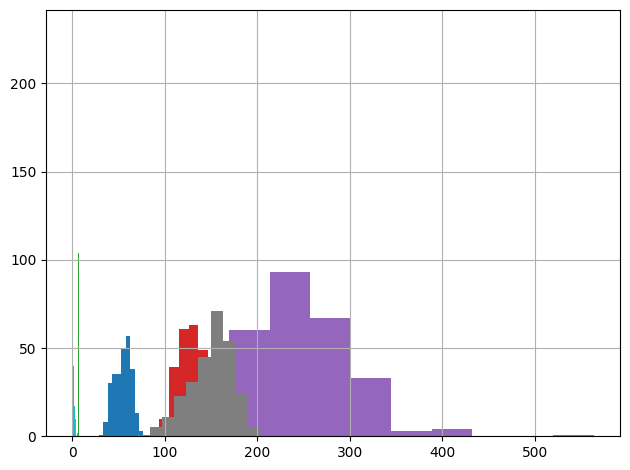

In [ ]:
# Plotting for all columns
data_cleaned1['age'].hist()
data_cleaned1['sex '].hist()
data_cleaned1['cpt'].hist()
data_cleaned1['rbt'].hist()
data_cleaned1['sc'].hist()
data_cleaned1['fbt'].hist()
data_cleaned1['rer'].hist()
data_cleaned1['mhr'].hist()
data_cleaned1['eia'].hist()
data_cleaned1['op'].hist()
data_cleaned1['st'].hist()
data_cleaned1['mv'].hist()
data_cleaned1['th'].hist()
data_cleaned1['hd'].hist()
plt.tight_layout()
plt.show()

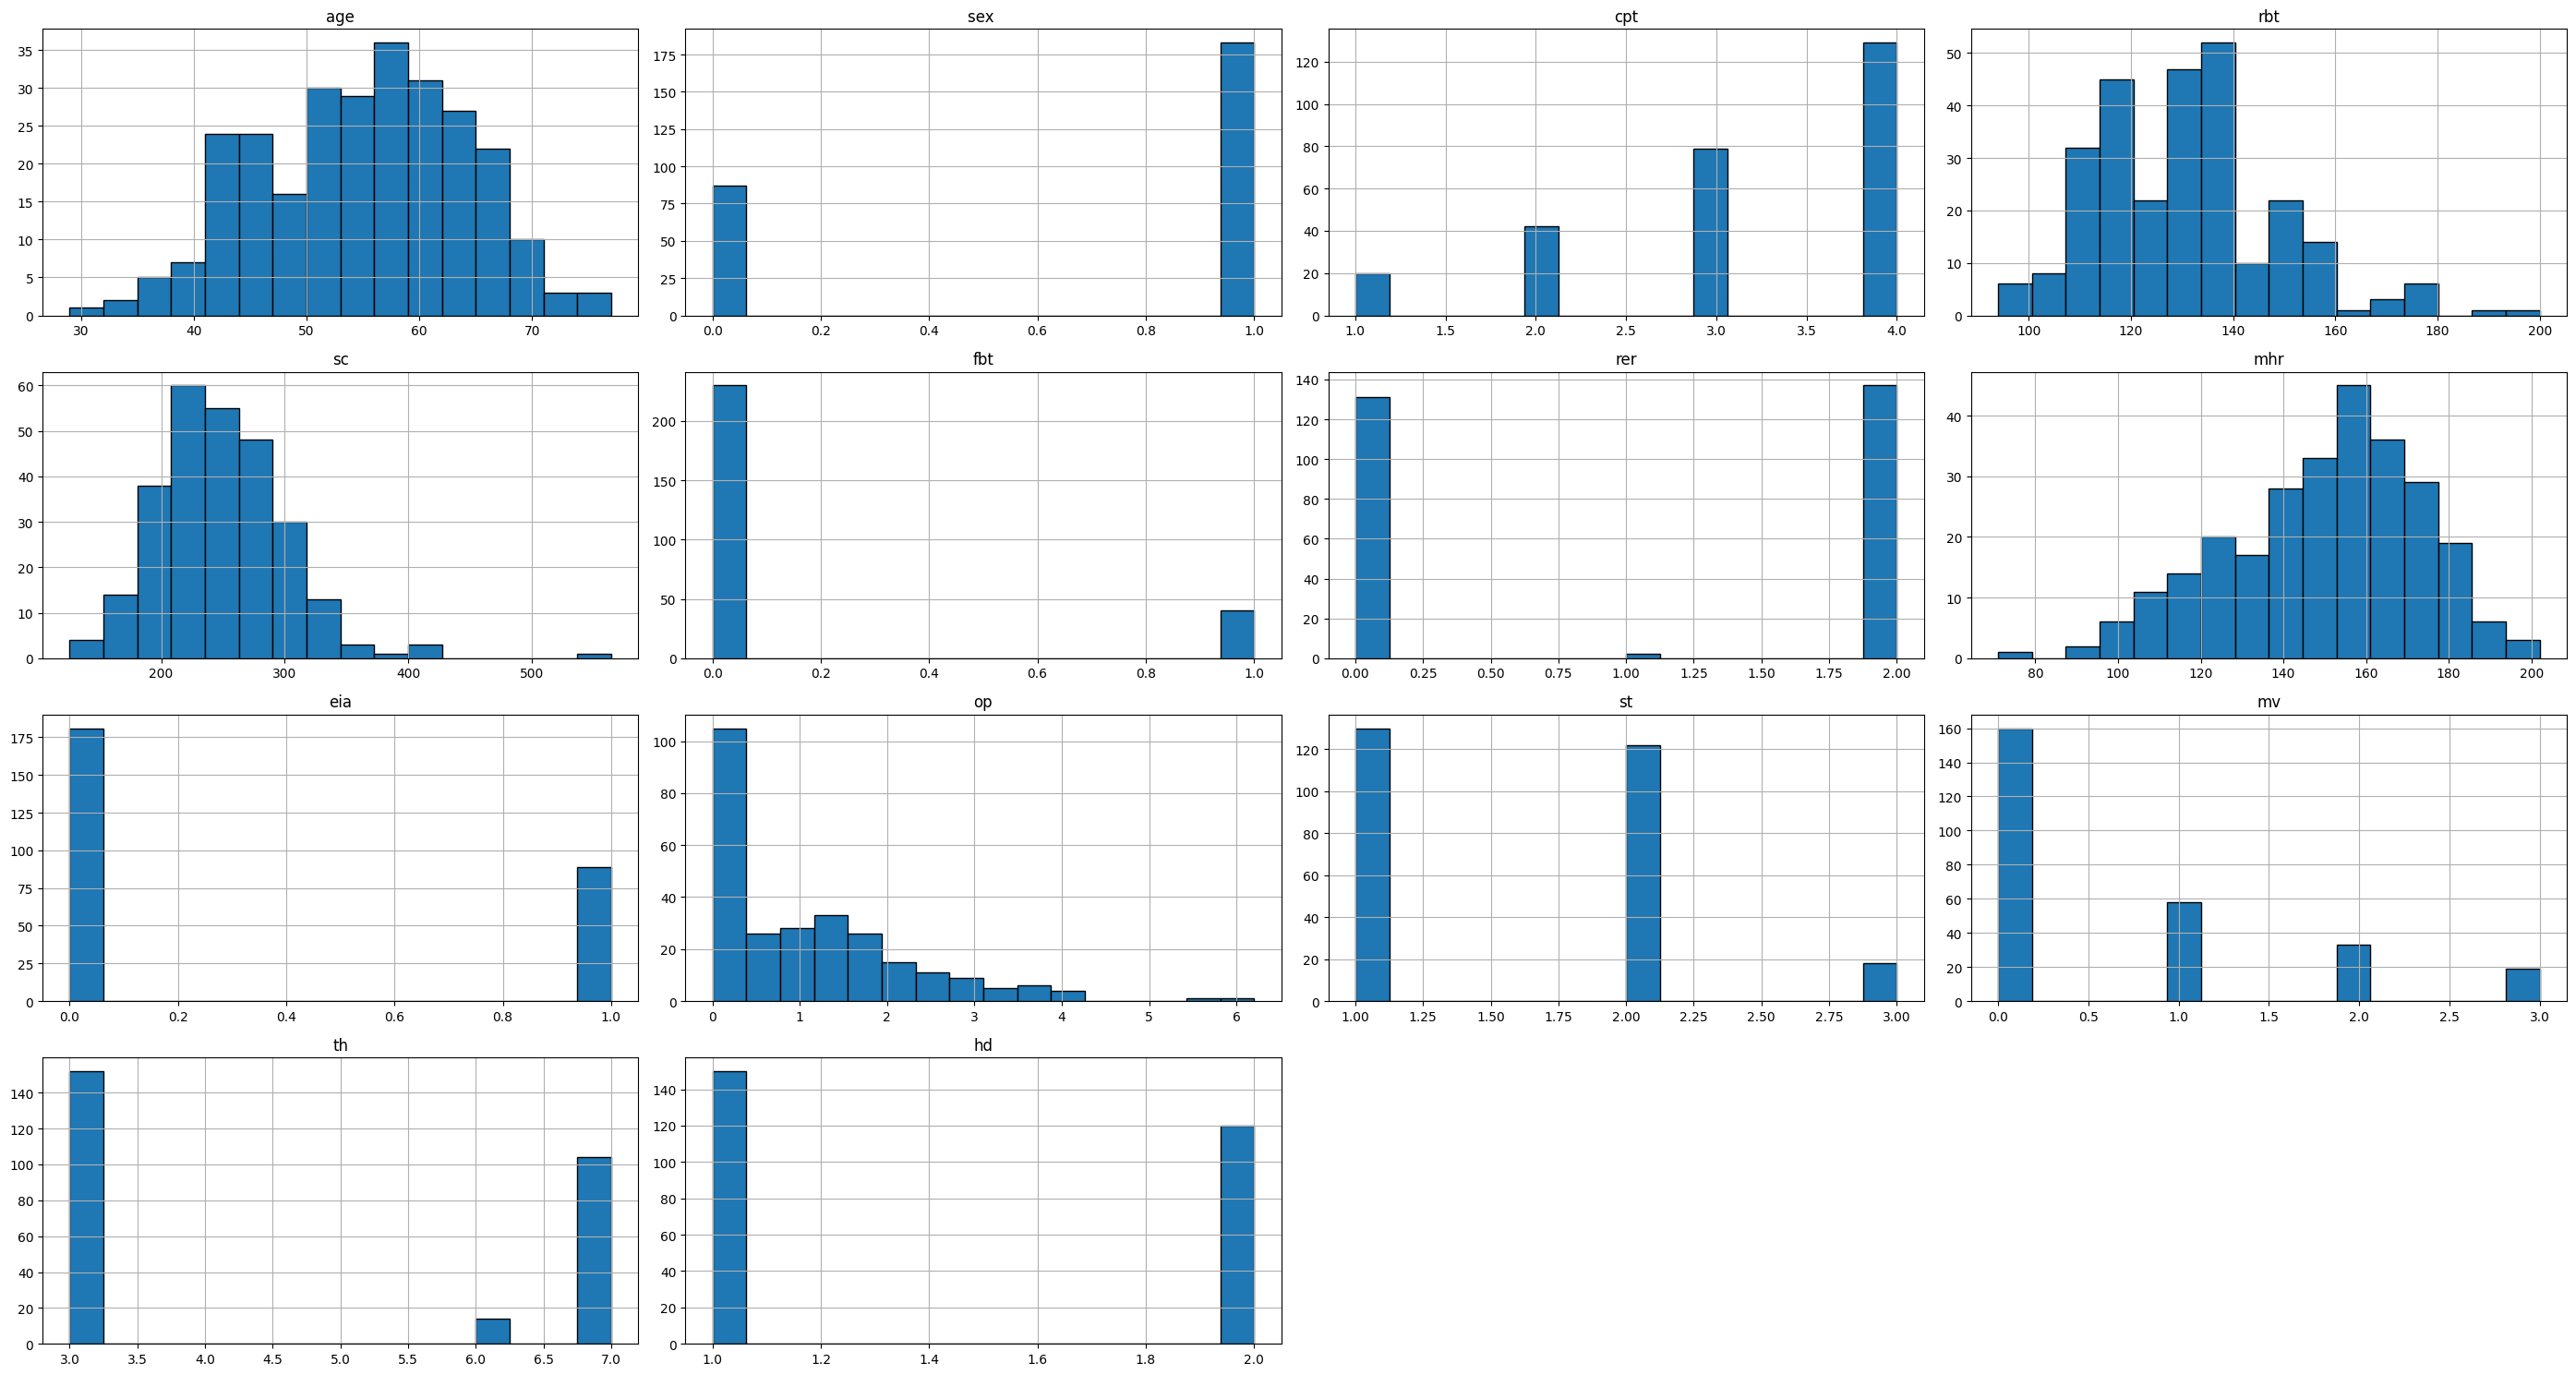

In [ ]:
data_cleaned1.hist(figsize=figsize, bins=bins, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
#calculaing outliers with IOR method for all columns
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_col = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        print(f'Outliers in {column}:')
        print(outliers_col)
    return outliers

outliers_iqr = detect_outliers_iqr(df)
print(outliers_iqr)

NameError: name 'df' is not defined

Calculating outliers using Box plot


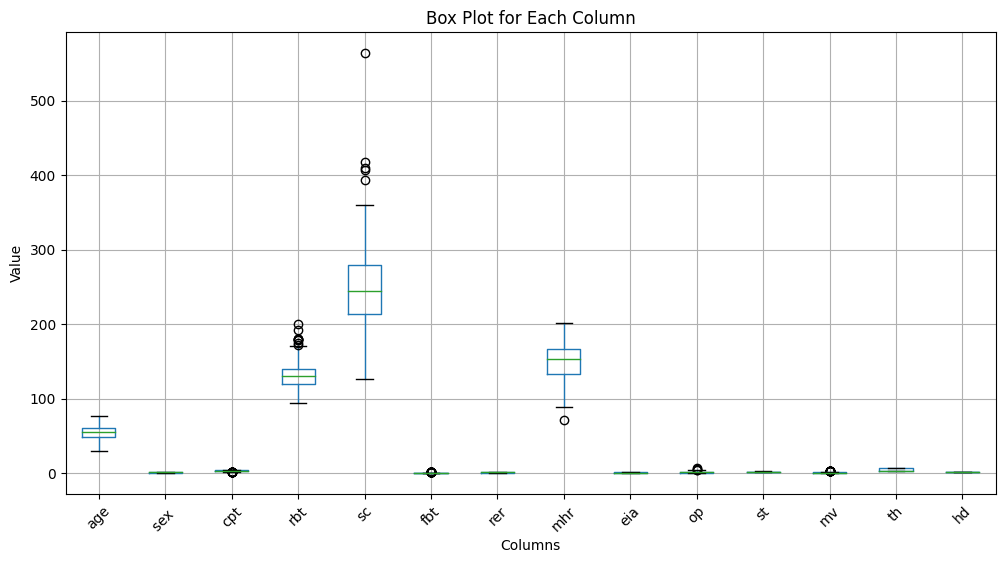

In [ ]:
# Create box plots for all columns
plt.figure(figsize=(12, 6))
data_cleaned1.boxplot()
plt.title('Box Plot for Each Column')
plt.ylabel('Value')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

[array([], dtype=float64),
 array([], dtype=float64),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]),
 array([174., 178., 180., 200., 192., 178., 180., 180., 172.]),
 array([564., 407., 417., 409., 394.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]),
 array([], dtype=float64),
 array([71.]),
 array([], dtype=float64),
 array([4.2, 5.6, 4.2, 6.2]),
 array([], dtype=float64),
 array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.]),
 array([], dtype=float64),
 array([], dtype=float64)]

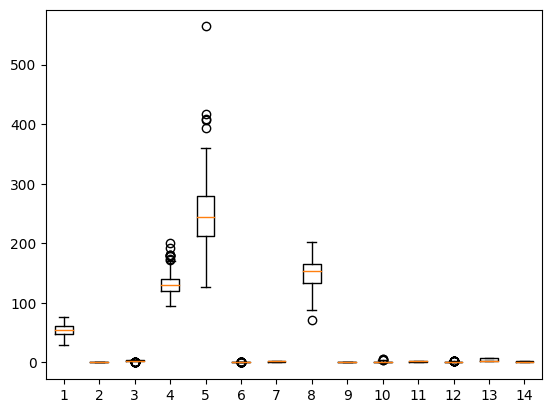

In [ ]:
box=plt.boxplot(data_cleaned1)
[item.get_ydata() for item in box['fliers']] #fliers are outliers

In [ ]:
#To get the whiskers
[item.get_ydata()[1] for item in box['whiskers']]

[29.0,
 77.0,
 0.0,
 1.0,
 2.0,
 4.0,
 94.0,
 170.0,
 126.0,
 360.0,
 0.0,
 0.0,
 0.0,
 2.0,
 88.0,
 202.0,
 0.0,
 1.0,
 0.0,
 4.0,
 1.0,
 3.0,
 0.0,
 2.0,
 3.0,
 7.0,
 1.0,
 2.0]

In [ ]:
data_cleaned1.tail(20)

,age,sex,cpt,rbt,sc,fbt,rer,mhr,eia,op,st,mv,th,hd
250,54,1,4,120,188,0,0,113,0,1.4,2,1,7,2
251,44,1,2,130,219,0,2,188,0,0.0,1,0,3,1
252,44,1,4,112,290,0,2,153,0,0.0,1,1,3,2
253,51,1,3,110,175,0,0,123,0,0.6,1,0,3,1
254,59,1,3,150,212,1,0,157,0,1.6,1,0,3,1
255,71,0,2,160,302,0,0,162,0,0.4,1,2,3,1
256,61,1,3,150,243,1,0,137,1,1.0,2,0,3,1
257,55,1,4,132,353,0,0,132,1,1.2,2,1,7,2
258,64,1,3,140,335,0,0,158,0,0.0,1,0,3,2
259,43,1,4,150,247,0,0,171,0,1.5,1,0,3,1


In [ ]:
data_cleaned1.describe()
#data_cleaned2 = pd.DataFrame(data_cleaned1)
#data_cleaned2


,age,sex,cpt,rbt,sc,fbt,rer,mhr,eia,op,st,mv,th,hd
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


<Axes: >

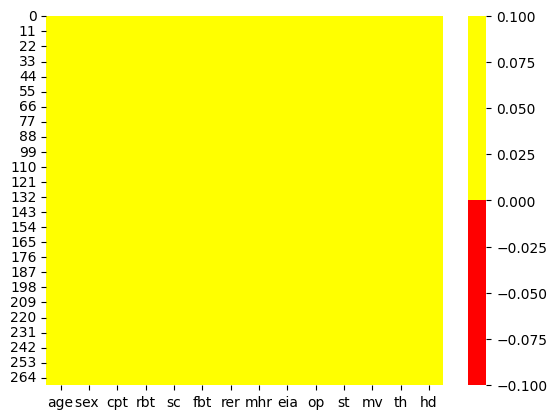

In [ ]:
# Checking missing values in the dataset
cols = data_cleaned1.columns
colours = ['#ff0000', '#ffff00'] # specify the colours -red is not missing,yellow is missing.
sns.heatmap(data_cleaned1[cols].isnull(),
cmap=sns.color_palette(colours))

the plot shows all missing values ???? why i do not understand.

In [ ]:
data_cleaned1[data_cleaned1.isnull().any(axis=1)].head()

,age,sex,cpt,rbt,sc,fbt,rer,mhr,eia,op,st,mv,th,hd



There are no duplicate rows and no columns with datatype 'category'  or non numeric data type thus bar plot no executed. although the heatmap shows all values as missing, still proceeding with Scatter plot and Correlation Analysis.
[ ]
#
Colab paid products - Cancel contracts here
Drop files to upload them to session storage.
Disk
81.35 GB available
  0s
completed at 7:44 PM


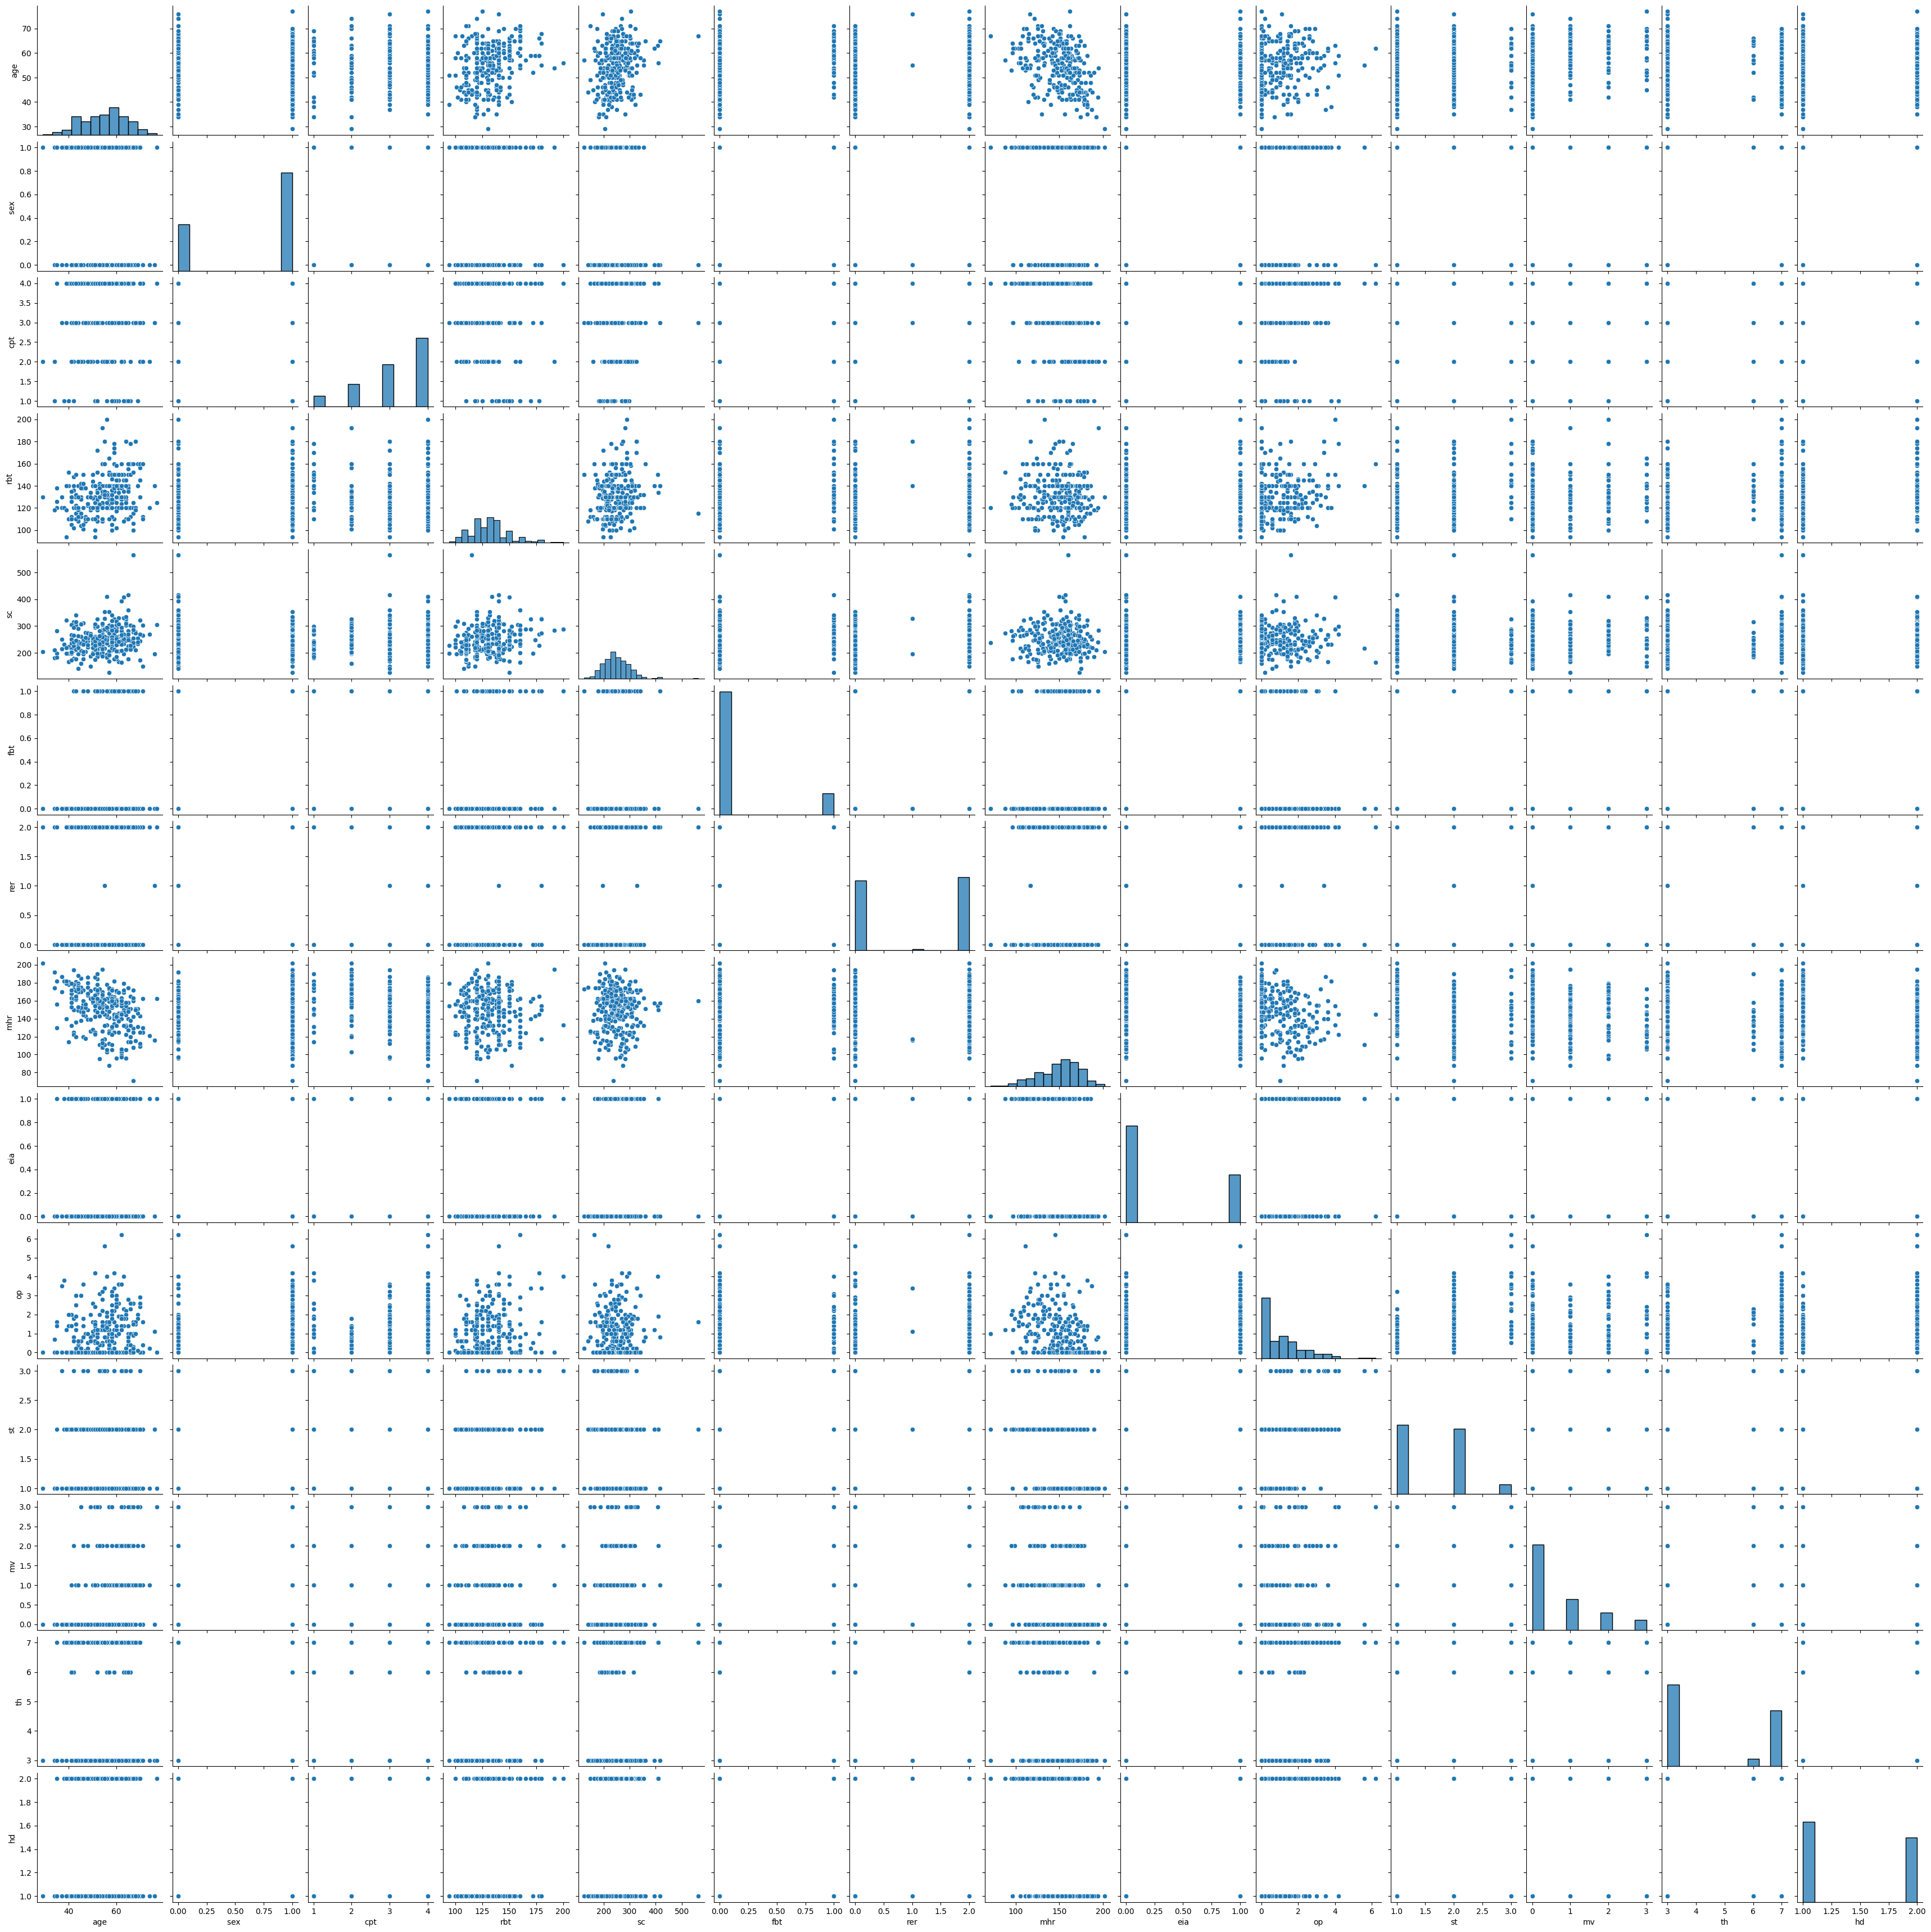

In [ ]:
#Scatter plot for the data set
sns.pairplot(data_cleaned1)

In [ ]:
#Correlation
data_cleaned1.corr()

,age,sex,cpt,rbt,sc,fbt,rer,mhr,eia,op,st,mv,th,hd
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
cpt,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
rbt,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
sc,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
fbt,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
rer,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
mhr,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
eia,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
op,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


<BarContainer object of 270 artists>

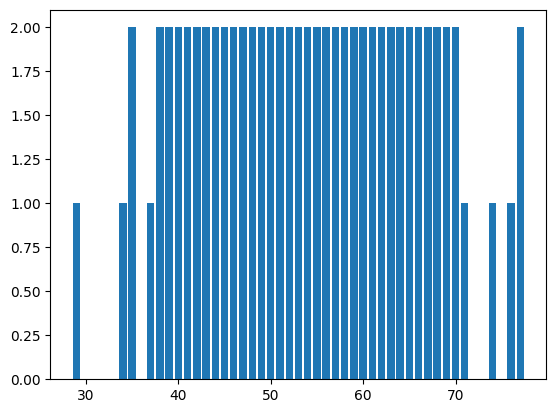

In [ ]:
plt.bar(data_cleaned1['age'],data_cleaned1['h'])